In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
plt.style.use('fivethirtyeight')


In [2]:
df = pd.read_csv("D:\Project\AMZN.csv")
#, index_col='Date', parse_dates=['Date']
df['Days'] = list(range(1, len(df) + 1))
df


,Date,Open,High,Low,Close,Adj Close,Volume,Days
0,2022-04-25,144.022995,146.221497,142.306503,146.074005,146.074005,61874000,1
1,2022-04-26,144.800003,144.856003,138.929504,139.391006,139.391006,77530000,2
2,2022-04-27,140.191498,141.948502,135.783493,138.167007,138.167007,71336000,3
3,2022-04-28,142.177994,145.937500,140.300003,144.596497,144.596497,117316000,4
4,2022-04-29,129.848999,130.761002,121.625000,124.281502,124.281502,272662000,5
...,...,...,...,...,...,...,...,...
245,2023-04-17,103.160004,103.730003,101.589996,102.739998,102.739998,39919500,246
246,2023-04-18,103.949997,104.199997,101.519997,102.300003,102.300003,39790500,247
247,2023-04-19,101.580002,105.120003,101.389999,104.300003,104.300003,58398900,248
248,2023-04-20,103.529999,105.250000,103.209999,103.809998,103.809998,57696900,249


In [3]:
df.shape

(250, 8)

In [4]:
actual_price = df.tail(1)
actual_price

,Date,Open,High,Low,Close,Adj Close,Volume,Days
249,2023-04-21,106.099998,108.150002,105.080002,106.959999,106.959999,86689700,250


In [5]:
df = df.head(len(df)-1)
print(df)

           Date        Open        High         Low       Close   Adj Close  \
0    2022-04-25  144.022995  146.221497  142.306503  146.074005  146.074005   
1    2022-04-26  144.800003  144.856003  138.929504  139.391006  139.391006   
2    2022-04-27  140.191498  141.948502  135.783493  138.167007  138.167007   
3    2022-04-28  142.177994  145.937500  140.300003  144.596497  144.596497   
4    2022-04-29  129.848999  130.761002  121.625000  124.281502  124.281502   
..          ...         ...         ...         ...         ...         ...   
244  2023-04-14  102.070000  103.199997  101.110001  102.510002  102.510002   
245  2023-04-17  103.160004  103.730003  101.589996  102.739998  102.739998   
246  2023-04-18  103.949997  104.199997  101.519997  102.300003  102.300003   
247  2023-04-19  101.580002  105.120003  101.389999  104.300003  104.300003   
248  2023-04-20  103.529999  105.250000  103.209999  103.809998  103.809998   

        Volume  Days  
0     61874000     1  
1    

In [6]:
days = list()
adj_close_prices = list()

In [7]:
df_days = df.loc[:,'Days']
df_adj_close = df.loc[:,'Adj Close']

In [8]:
for day in df_days:
    days.append([int(day)])
    
for adj_close_price in df_adj_close:
    adj_close_prices.append(float(adj_close_price))

In [9]:
print(days)
print(adj_close_prices)

[[1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14], [15], [16], [17], [18], [19], [20], [21], [22], [23], [24], [25], [26], [27], [28], [29], [30], [31], [32], [33], [34], [35], [36], [37], [38], [39], [40], [41], [42], [43], [44], [45], [46], [47], [48], [49], [50], [51], [52], [53], [54], [55], [56], [57], [58], [59], [60], [61], [62], [63], [64], [65], [66], [67], [68], [69], [70], [71], [72], [73], [74], [75], [76], [77], [78], [79], [80], [81], [82], [83], [84], [85], [86], [87], [88], [89], [90], [91], [92], [93], [94], [95], [96], [97], [98], [99], [100], [101], [102], [103], [104], [105], [106], [107], [108], [109], [110], [111], [112], [113], [114], [115], [116], [117], [118], [119], [120], [121], [122], [123], [124], [125], [126], [127], [128], [129], [130], [131], [132], [133], [134], [135], [136], [137], [138], [139], [140], [141], [142], [143], [144], [145], [146], [147], [148], [149], [150], [151], [152], [153], [154], [155], [156], [157], [158], [

In [10]:
lin_svr = SVR(kernel = 'linear', C=1000.0)
lin_svr.fit(days,adj_close_prices)

SVR(C=1000.0, kernel='linear')

In [11]:
poly_svr = SVR(kernel = 'poly', C=1000.0, degree = 2)
poly_svr.fit(days,adj_close_prices)

SVR(C=1000.0, degree=2, kernel='poly')

In [12]:
rbf_svr = SVR(kernel = 'rbf', C=1000.0, gamma = 0.1)
rbf_svr.fit(days,adj_close_prices)

SVR(C=1000.0, gamma=0.1)

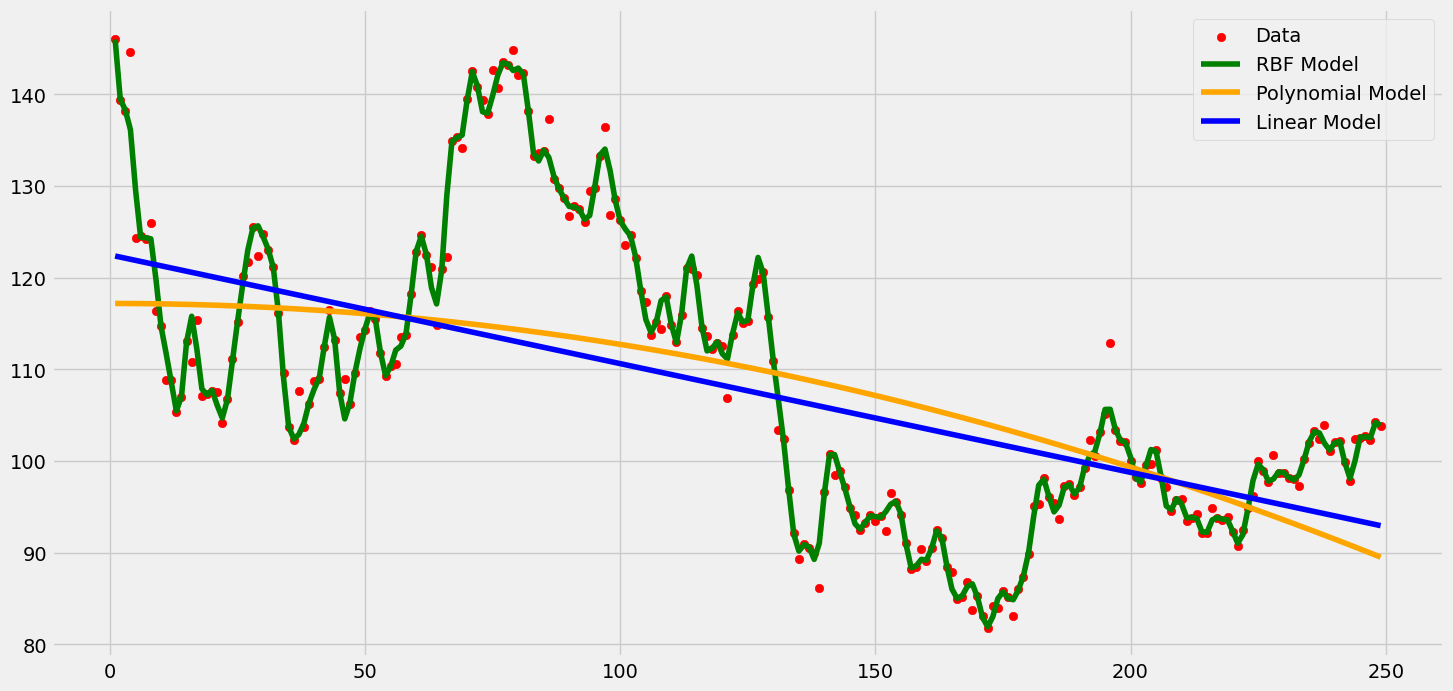

In [13]:
plt.figure(figsize=(16,8))
plt.scatter(days, adj_close_prices, color = 'red', label = 'Data')
plt.plot(days, rbf_svr.predict(days), color = 'green', label = 'RBF Model')
plt.plot(days, poly_svr.predict(days), color ='orange', label = 'Polynomial Model')
plt.plot(days, lin_svr.predict(days), color ='blue', label='Linear Model')
plt.legend()
plt.show()

In [14]:
day = [[31]]
print(rbf_svr.predict(day))
print(poly_svr.predict(day))
print(lin_svr.predict(day))

[123.09970318]
[116.75606848]
[118.8016149]


In [15]:
from sklearn.model_selection import train_test_split
from math import sqrt

X_train, X_test, y_train, y_test = train_test_split(days, adj_close_prices, test_size=0.2, random_state=42)

# Define a list of SVM kernels to evaluate
kernels = ['linear', 'poly', 'rbf']

# Loop through each kernel and train and evaluate an SVM model
for kernel in kernels:
    # Train an SVM model with the current kernel
    model = SVR(kernel=kernel)
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate the RMSE for the current model
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    
    # Print the RMSE for the current model
    print('RMSE for {} kernel: {:.4f}'.format(kernel, rmse))


RMSE for linear kernel: 11.2097
RMSE for poly kernel: 11.3662
RMSE for rbf kernel: 7.9926
